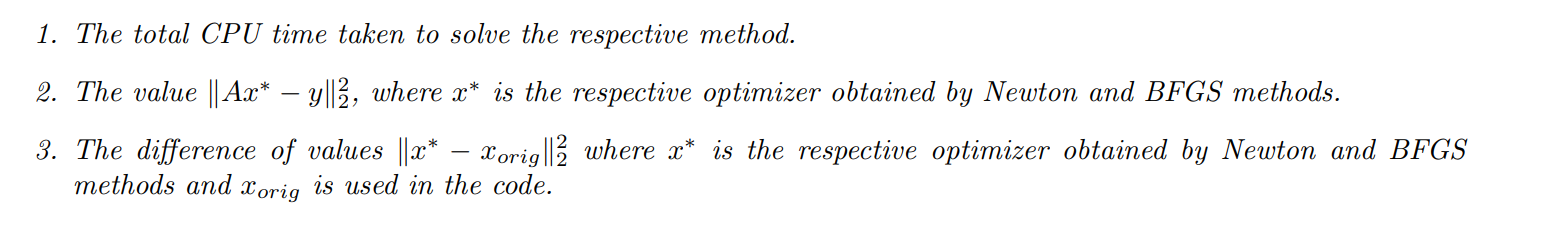

#NEWTON#

In [ ]:
def f(x,A,y, lamda):
  return 0.5*np.linalg.norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_f(x,A,y, lamda):

  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x

def hessian(x,A,lamda):
  return A.transpose()@A + lamda*np.identity(A.shape[1])
def get_alpha_with_scaling(xk,A,y, rho, Dk,lamda):
  alpha = 0.99
  gamma=0.5
  pk = -grad_f(xk,A,y,lamda)
  while f(xk + alpha*Dk@pk,A,y,lamda) > (f(xk,A,y,lamda) + gamma*alpha*grad_f(xk,A,y,lamda)@Dk@pk):
    alpha = rho*alpha
  return alpha
def newton_method_with_backtrack(x,A,y,tau,lamda):
  k=0
  iteration=[]
  x=np.copy(x)
  tau=1e-5
  optimal_value=[]
  optimizers=[]
  all_x=[]
  rho=0.5
  f_norm=np.linalg.norm(grad_f(x,A,y,lamda))

  while f_norm>tau:
    #print(f_norm)

    Dk=np.linalg.inv(hessian(x,A,lamda))
    alpha=get_alpha_with_scaling(x,A,y,rho,Dk,lamda)
    x=x-alpha*(np.linalg.inv(hessian(x,A,lamda))@grad_f(x,A,y,lamda))
    f_norm=np.linalg.norm(grad_f(x,A,y,lamda))

    # print(x)
    k=k+1
    #print(f_norm)

  optimizers.append(x)

  iteration.append(k)
  return iteration,optimizers

# newtontime_list=[]
# lamdalist = [0.001]

# for lamda in lamdalist:
#   start = time.time()
#   tau=1e-5
#   x=[0 for i in range(64)]
#   iteration_with_scale,optimal_value_with_scale,optimizers_with_scale,all_x_with_scale=newton_method_with_backtrack(x,A,y,tau,lamda)
#   newton_time = time.time() - start
#   newtontime_list.append(newton_time)
#   print(f'Iteration:{iteration_with_scale}')
#   print(f'optimizers:{optimizers_with_scale}')
#   print(f' optimal value:{optimal_value_with_scale}')

In [ ]:
# Code for Newton method
import numpy as np
import timeit
np . random . seed (10) #for repeatability
N = 200
ds = [1000 , 5000 , 10000 , 20000 , 25000 , 50000 , 100000 , 200000 , 500000 , 1000000]
lambda_reg = 0.001
eps = np . random . randn (N ,1) # random noise
#For each value of dimension in the ds array , we will check the behavior of Newton method
tau=1e-4
for i in range ( np . size ( ds ) ) :
  d = ds [ i ]
  A = np . random . randn (N , d )
# Normalize the columns
  for j in range ( A . shape [1]) :
    A [: , j ] = A [: , j ]/ np . linalg . norm ( A [: , j ])
  xorig = np.ones (( d ,1) )
  y = (np.dot (A , xorig ) + eps).flatten()

  start = timeit . default_timer ()
  x=[0 for i in range(d)]
# call Newton method with A,y, lambda and obtain the optimal solution x_opt
  iteration_with_scale,optimizers=newton_method_with_backtrack(x,A,y,tau,lambda_reg)

  a=(A@optimizers[0])-y
  # newton_time = time.time() - start
  # newtontime_list.append(newton_time)
  print(f'Iteration :{iteration_with_scale} for value of d:{d}')
  print(f'Norm value:{(np.linalg.norm(a))**2}')
  xorig=xorig.flatten()
  optimizers=optimizers[0].flatten()
  print(f'Difference value:{(np.linalg.norm(optimizers[0]-xorig))**2}')

# x_opt = Newton (A,y, lambda_reg )
  newtontime = timeit . default_timer () - start # time is in seconds
  print('time taken:',newtontime)
  print('........................................................................')
# print the total time and the L2 norm difference || x_opt - xorig || for Newton method



Iteration :[4] for value of d:1000
Norm value:7.525646053052483e-05
Difference value:768.4393402243167
time taken: 1.6346927190000002
........................................................................
Iteration :[4] for value of d:5000
Norm value:8.89259475121172e-06
Difference value:6844.634463587038
time taken: 111.41831284099999
........................................................................
Iteration :[4] for value of d:10000
Norm value:4.733275181829721e-06
Difference value:11005.442983174908
time taken: 772.792385054
........................................................................


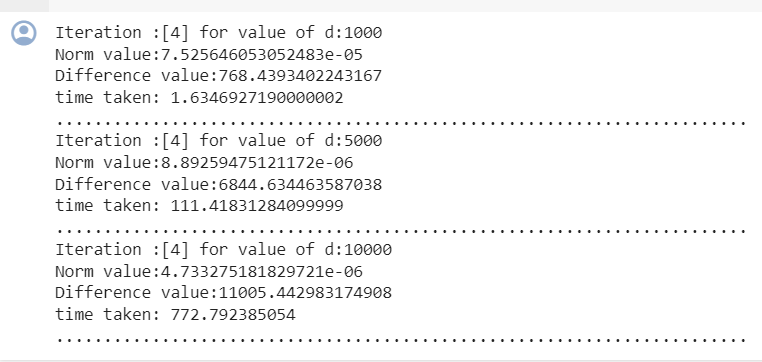

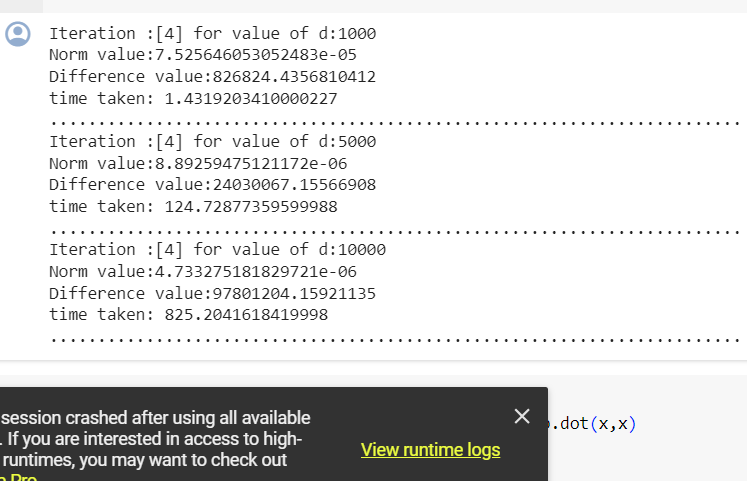

In [ ]:
from prettytable import PrettyTable

In [ ]:
table_newton=PrettyTable(['Method','Iteration','VAlue of d',"Norm value( ∥Ax∗ − y∥^2)","Difference value( ∥x∗ − xorig∥^2)",'Time Taken'])
table_newton.add_row(['NEWTON','4','1000','7.525646053052483e-05','768.4393402243167','1.6346927190000002'])
table_newton.add_row(['NEWTON','4','5000','8.89259475121172e-06','6844.634463587038','111.41831284099999'])
table_newton.add_row(['NEWTON','4','10000','4.733275181829721e-06','11005.442983174908','772.792385054'])
print(table_newton)


+--------+-----------+------------+--------------------------+-----------------------------------+--------------------+
| Method | Iteration | VAlue of d | Norm value( ∥Ax∗ − y∥^2) | Difference value( ∥x∗ − xorig∥^2) |     Time Taken     |
+--------+-----------+------------+--------------------------+-----------------------------------+--------------------+
| NEWTON |     4     |    1000    |  7.525646053052483e-05   |         768.4393402243167         | 1.6346927190000002 |
| NEWTON |     4     |    5000    |   8.89259475121172e-06   |         6844.634463587038         | 111.41831284099999 |
| NEWTON |     4     |   10000    |  4.733275181829721e-06   |         11005.442983174908        |   772.792385054    |
+--------+-----------+------------+--------------------------+-----------------------------------+--------------------+


FOR d=20000 newton method show runtime error  as session crashed, this is due to newton require more space for high dimension or we can say for computing inverse for hesian of high dimension we require large memory due to which newton  crashed the session.

#BFGS#

In [ ]:
def f(x,A,y, lamda):
  return 0.5*np.linalg.norm(A@x-y)**2 + 0.5*lamda*np.dot(x,x)

def grad_f(x,A,y, lamda):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lamda*x

def hessian(x,A,lamda):
  return A.transpose()@A + lamda*np.identity(A.shape[1])
def get_alpha_bfgs(xk,A,y, alpha0, rho, gamma, Bk,lamda):
  alpha = alpha0
  pk = -grad_f(xk,A,y,lamda)
  while f(xk + alpha*Bk@pk,A,y,lamda) > (f(xk,A,y,lamda) + gamma*alpha*grad_f(xk,A,y,lamda)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0,A,y, tau, alpha0, rho, gamma, lamda):
  #start_time = time.time()
  max_iter=300
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_f(xk,A,y,lamda)
  xks = []

  while (np.linalg.norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk,A,y ,alpha0, rho, gamma, Bk,lamda)
    xnext = xk - alpha*(Bk@pk)


    sk = xnext - xk
    yk = grad_f(xnext,A,y,lamda) - grad_f(xk,A,y,lamda)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_f(xk,A,y,lamda)


    count += 1

  #end_time = time.time()
  #time_elapsed = end_time - start_time
  return count, xk #time_elapsed
# import time
# bfgstime_list=[]
# lamdalist = [1e-3]
# for lamda in lamdalist:
 # start = time.time()
alpha0 = 0.99
rho = 0.5
gamma = 0.5
tau=1e-5
#   x0=[i for i in range(64)]
#   iteration,minimizers,optimal,all_x=bfgs(x0,A,y,tau, alpha0, rho, gamma,lamda)
#   bfgstime = time.time() - start
#   bfgstime_list.append(bfgstime)
#   print('iteration:',iteration)
#   print('minimizers:',minimizers)
#   print('optimal_value_of_f:',optimal)

In [ ]:
# Code for BFGS method
import numpy as np
import timeit
np . random . seed (1000) #for repeatability
N = 200
ds = [1000 , 5000 , 10000 , 20000 , 25000 , 50000 , 100000 , 200000 , 500000 , 1000000]
lambda_reg = 0.001
eps = np . random . randn (N ,1) # random noise
#For each value of dimension in the ds array , we will check the behavior of BFGS method

for i in range ( np . size ( ds ) ) :
  d = ds [ i ]
  A = np . random . randn (N , d ) # Normalize the columns
  for j in range ( A . shape [1]) :
    A [: , j ] = A [: , j ]/ np . linalg . norm ( A [: , j ])
  xorig = np . ones (( d ,1) )
  y = (np . dot (A , xorig ) + eps).flatten()
  start = timeit . default_timer ()
  # call Newton method with A,y, lambda and obtain the optimal solution x_opt
  # x_opt = Newton (A,y, lambda_reg )
  newtontime = timeit . default_timer () - start # time is in seconds
  # print the total time , || Ax_opt -y ||^2 and the L2 norm difference || x_opt -xorig ||^2 for Newton method

  start = timeit . default_timer ()
  # call BFGS method with A,y, lambda and obtain the optimal solution x_opt_bfgs
  x0=[0 for i in range(d)]
  iteration,optimizers=bfgs(x0,A,y, tau, alpha0, rho, gamma, lambda_reg)
  a=(A@optimizers)-y

  print(f'Iteration :{iteration} for value of d:{d}')
  print(f'Norm value:{(np.linalg.norm(a))**2}')

  print(f'Difference value:{(np.linalg.norm(optimizers-(xorig).flatten()))**2}')

  # x_opt_bfgs = BFGS (A,y, lambda_reg )
  bfgstime = timeit . default_timer () - start # time is in seconds
  print('time taken:',bfgstime)
  print('........................................................................')
  # print the total time , || Ax_opt_bfgs -y ||^2 and the L2 norm difference ||x_opt_bfgs - xorig ||^2 for BFGS method


Iteration :33 for value of d:1000
Norm value:5.672643454513174e-05
Difference value:865.3153032028482
time taken: 13.278527218000022
........................................................................
Iteration :46 for value of d:5000
Norm value:9.793228311370231e-06
Difference value:4783.681693038774
time taken: 839.236849824
........................................................................
Iteration :48 for value of d:10000
Norm value:3.568022008660739e-06
Difference value:9829.015751366156
time taken: 6109.512324675
........................................................................


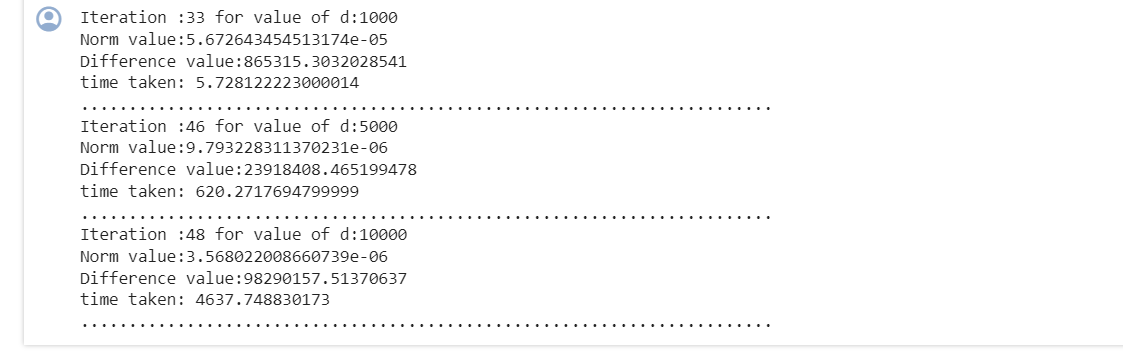

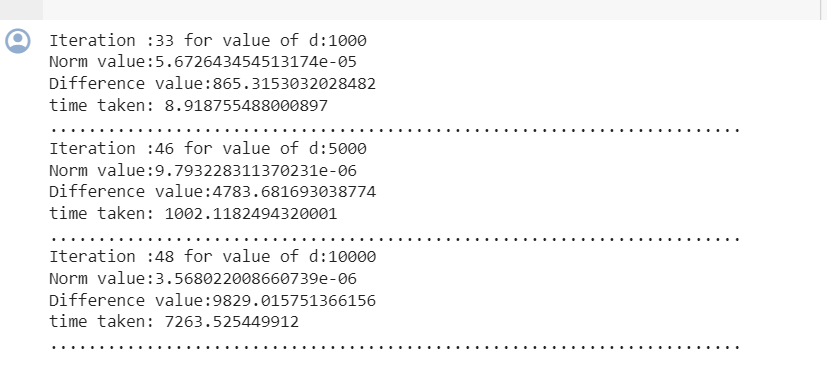

In [ ]:
from prettytable import PrettyTable


In [ ]:
table_bfgs=PrettyTable(['Method','Iteration','VAlue of d',"Norm value( ∥Ax∗ − y∥^2)","Difference value( ∥x∗ − xorig∥^2)",'Time Taken'])
table_bfgs.add_row(['BFGS','33','1000','5.672643454513174e-05','865.3153032028482','13.278527218000022'])
table_bfgs.add_row(['BFGS','46','5000','9.793228311370231e-06','4783.681693038774','839.236849824'])
table_bfgs.add_row(['BFGS','48','10000','3.568022008660739e-06','9829.015751366156','6109.512324675'])
print(table_bfgs)


+--------+-----------+------------+--------------------------+-----------------------------------+--------------------+
| Method | Iteration | VAlue of d | Norm value( ∥Ax∗ − y∥^2) | Difference value( ∥x∗ − xorig∥^2) |     Time Taken     |
+--------+-----------+------------+--------------------------+-----------------------------------+--------------------+
|  BFGS  |     33    |    1000    |  5.672643454513174e-05   |         865.3153032028482         | 13.278527218000022 |
|  BFGS  |     46    |    5000    |  9.793228311370231e-06   |         4783.681693038774         |   839.236849824    |
|  BFGS  |     48    |   10000    |  3.568022008660739e-06   |         9829.015751366156         |   6109.512324675   |
+--------+-----------+------------+--------------------------+-----------------------------------+--------------------+


After d=10000 in newton their is runtime error which is due to memory issue of colab so newton requires more memory as compare to bfgs because bfgs take more time than newton but it runs for other values of d

#TABULAR FORM #


In [ ]:
table=PrettyTable(['Method','Iteration','VAlue of d',"Norm value( ∥Ax∗ − y∥^2)","Difference value( ∥x∗ − xorig∥^2)",'Time Taken'])
table.add_row(['NEWTON','4','1000','7.525646053052483e-05','768.4393402243167','1.6346927190000002'])
table.add_row(['NEWTON','4','5000','8.89259475121172e-06','6844.634463587038','111.41831284099999'])
table.add_row(['NEWTON','4','10000','4.733275181829721e-06','11005.442983174908','772.792385054'])
table.add_row(['BFGS','33','1000','5.672643454513174e-05','865.3153032028482','13.278527218000022'])
table.add_row(['BFGS','46','5000','9.793228311370231e-06','4783.681693038774','839.236849824'])
table.add_row(['BFGS','48','10000','3.568022008660739e-06','9829.015751366156','6109.512324675'])
print(table)

+--------+-----------+------------+--------------------------+-----------------------------------+--------------------+
| Method | Iteration | VAlue of d | Norm value( ∥Ax∗ − y∥^2) | Difference value( ∥x∗ − xorig∥^2) |     Time Taken     |
+--------+-----------+------------+--------------------------+-----------------------------------+--------------------+
| NEWTON |     4     |    1000    |  7.525646053052483e-05   |         768.4393402243167         | 1.6346927190000002 |
| NEWTON |     4     |    5000    |   8.89259475121172e-06   |         6844.634463587038         | 111.41831284099999 |
| NEWTON |     4     |   10000    |  4.733275181829721e-06   |         11005.442983174908        |   772.792385054    |
|  BFGS  |     33    |    1000    |  5.672643454513174e-05   |         865.3153032028482         | 13.278527218000022 |
|  BFGS  |     46    |    5000    |  9.793228311370231e-06   |         4783.681693038774         |   839.236849824    |
|  BFGS  |     48    |   10000    |  3.5

IN this table shows newton method needs less time as compared to bfgs and some trend also observe for norm values of error and difference value that is some time newton is better for small d but for large value of d bfgs seems to be better in terms of results also.




**Remark:**

We always not get the same result for same method it is due to network and memory issue of colab therefore I stick  2 or 3 snip for each method to observe result and use final runtime to create tabular observation.